# Consumer price indices

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Consumer Price Index.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,4,Afghanistan,2005,Consumer price index: General,71.6,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
1,4,Afghanistan,2010,Consumer price index: General,100.0,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
2,4,Afghanistan,2015,Consumer price index: General,132.9,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
3,4,Afghanistan,2018,Consumer price index: General,146.5,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
4,4,Afghanistan,2019,Consumer price index: General,149.9,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2063,716,Zimbabwe,2010,Consumer price index: General,100.0,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
2064,716,Zimbabwe,2015,Consumer price index: General,106.2,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
2065,716,Zimbabwe,2018,Consumer price index: General,116.7,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
2066,716,Zimbabwe,2010,Consumer price index: Food,100.0,Estimate.,Calculated by the UN Statistics Division from ...,"United Nations Statistics Division (UNSD), New...",NaN,NaN


In [5]:
df.shape

(2068, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  2068 non-null   int64  
 1   Unnamed: 1           2068 non-null   object 
 2   Year                 2068 non-null   int64  
 3   Series               2068 non-null   object 
 4   Value                2068 non-null   float64
 5   Footnotes            1474 non-null   object 
 6   Source               2068 non-null   object 
 7   Unnamed: 7           433 non-null    object 
 8   Unnamed: 8           41 non-null     object 
 9   Unnamed: 9           10 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 161.7+ KB


In [7]:
df.rename(
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Country/Area'}, inplace=True)

df.head()

,Code,Country/Area,Year,Series,Value,Footnotes,Source,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,4,Afghanistan,2005,Consumer price index: General,71.6,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
1,4,Afghanistan,2010,Consumer price index: General,100.0,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
2,4,Afghanistan,2015,Consumer price index: General,132.9,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
3,4,Afghanistan,2018,Consumer price index: General,146.5,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN
4,4,Afghanistan,2019,Consumer price index: General,149.9,NaN,"United Nations Statistics Division (UNSD), New...",NaN,NaN,NaN


In [8]:
df1 = df[['Code', 'Country/Area', 'Year', 'Series', 'Value']]
df1.head()

,Code,Country/Area,Year,Series,Value
0,4,Afghanistan,2005,Consumer price index: General,71.6
1,4,Afghanistan,2010,Consumer price index: General,100.0
2,4,Afghanistan,2015,Consumer price index: General,132.9
3,4,Afghanistan,2018,Consumer price index: General,146.5
4,4,Afghanistan,2019,Consumer price index: General,149.9


In [9]:
df1.shape

(2068, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code          2068 non-null   int64  
 1   Country/Area  2068 non-null   object 
 2   Year          2068 non-null   int64  
 3   Series        2068 non-null   object 
 4   Value         2068 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 80.9+ KB


In [11]:
df1.describe(include='object')

,Country/Area,Series
count,2068,2068
unique,202,2
top,Latvia,Consumer price index: General
freq,14,1249


In [12]:
df1['Country/Area'].value_counts()

Latvia            14
Iceland           14
United Kingdom    14
�land Islands     14
Japan             14
                  ..
Comoros            4
Libya              3
Yemen              3
Tuvalu             1
Nauru              1
Name: Country/Area, Length: 202, dtype: int64

In [13]:
df1['Series'].value_counts()

Consumer price index: General    1249
Consumer price index: Food        819
Name: Series, dtype: int64

In [14]:
df1['Code'].value_counts()

428    14
352    14
826    14
248    14
392    14
       ..
174     4
434     3
887     3
798     1
520     1
Name: Code, Length: 202, dtype: int64

# Data Cleaning

In [15]:
df1['Country/Area'].replace(
    {'�land Islands': 'Åland Islands',
    'C�te d�Ivoire': "Côte d'Ivoire", 
    'Cura�ao': 'Curaçao',
    'R�union': 'Réunion'}, inplace=True
)

df1['Country/Area'].unique()

array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Curaçao', 'Cyprus', 'Czechia',
       'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'F

In [16]:
df1.rename(columns={
    'Series': 'ConsumerPriceIndex'
}, inplace=True)

df1.head()

,Code,Country/Area,Year,ConsumerPriceIndex,Value
0,4,Afghanistan,2005,Consumer price index: General,71.6
1,4,Afghanistan,2010,Consumer price index: General,100.0
2,4,Afghanistan,2015,Consumer price index: General,132.9
3,4,Afghanistan,2018,Consumer price index: General,146.5
4,4,Afghanistan,2019,Consumer price index: General,149.9


In [17]:
df1['ConsumerPriceIndex'] = df1['ConsumerPriceIndex'].str.lstrip('Consumer price index: ') # left strip consumer price index
df1.head()

,Code,Country/Area,Year,ConsumerPriceIndex,Value
0,4,Afghanistan,2005,General,71.6
1,4,Afghanistan,2010,General,100.0
2,4,Afghanistan,2015,General,132.9
3,4,Afghanistan,2018,General,146.5
4,4,Afghanistan,2019,General,149.9


In [18]:
df1['ConsumerPriceIndex'].value_counts()

General    1249
Food        819
Name: ConsumerPriceIndex, dtype: int64

In [19]:
df1['Year'].value_counts()

2015    373
2010    338
2018    323
2019    317
2020    292
2005    229
2000    196
Name: Year, dtype: int64

In [20]:
df1['Value'].describe()

count     2068.000000
mean       215.531963
std       2288.887231
min          0.000000
25%        100.000000
50%        109.700000
75%        127.700000
max      93584.200000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

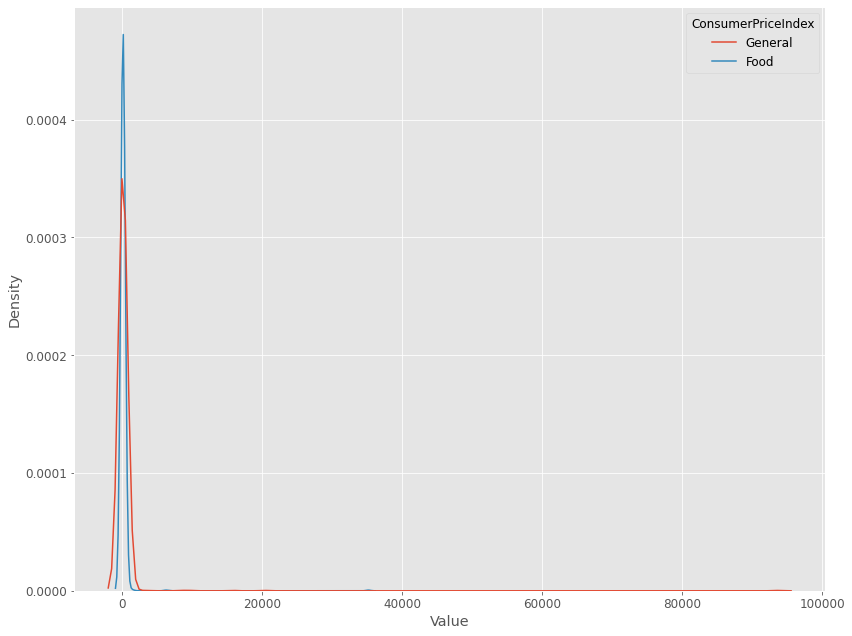

In [21]:
sns.kdeplot(data=df1, x='Value', hue='ConsumerPriceIndex')

# Missing Values Exploration

In [22]:
df1.isna().sum()

Code                  0
Country/Area          0
Year                  0
ConsumerPriceIndex    0
Value                 0
dtype: int64

# Grouping and Aggregation

In [23]:
df1_gpd = df1.groupby(['Country/Area', 'ConsumerPriceIndex'])                    
df1_gpd.head()

,Code,Country/Area,Year,ConsumerPriceIndex,Value
0,4,Afghanistan,2005,General,71.6
1,4,Afghanistan,2010,General,100.0
2,4,Afghanistan,2015,General,132.9
3,4,Afghanistan,2018,General,146.5
4,4,Afghanistan,2019,General,149.9
...,...,...,...,...,...
2063,716,Zimbabwe,2010,General,100.0
2064,716,Zimbabwe,2015,General,106.2
2065,716,Zimbabwe,2018,General,116.7
2066,716,Zimbabwe,2010,Food,100.0


# Data Visualization

In [24]:
# barplot helper function
def plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=ci, hue=hue, 
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_bar

# Consumer Price Index (General) Exploration

<function __main__.plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None)>

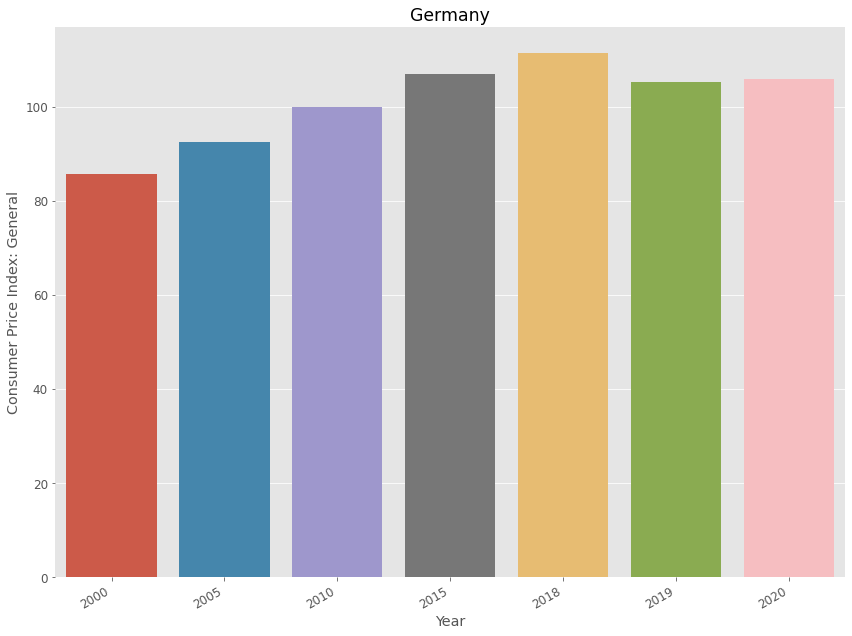

In [25]:
plot_bar(
    data=df1_gpd.get_group(('Germany', 'General')),
    x='Year', y='Value',
    title='Germany', xlabel='Year', ylabel='Consumer Price Index: General'
)

<function __main__.plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None)>

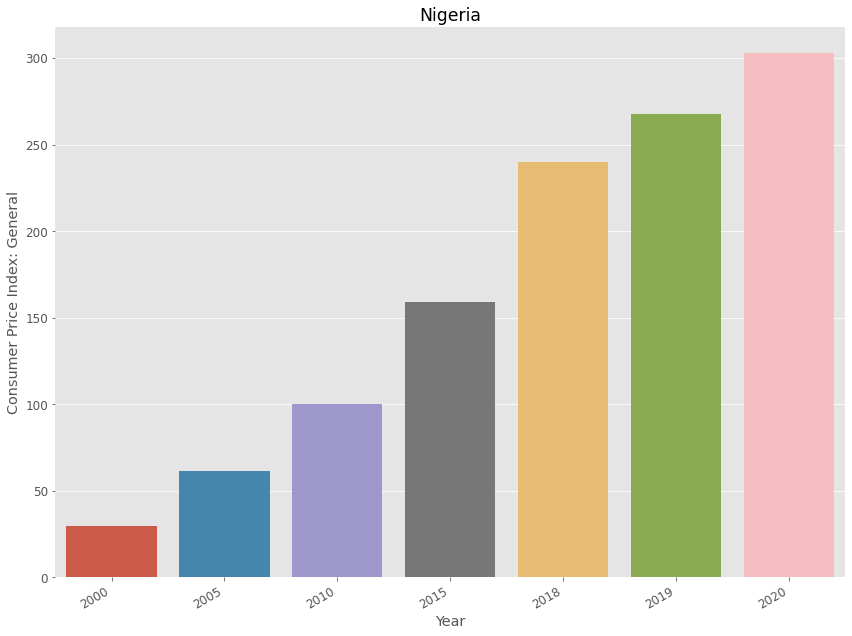

In [26]:
plot_bar(
    data=df1_gpd.get_group(('Nigeria', 'General')),
    x='Year', y='Value',
    title='Nigeria', xlabel='Year', ylabel='Consumer Price Index: General'
)

<function __main__.plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None)>

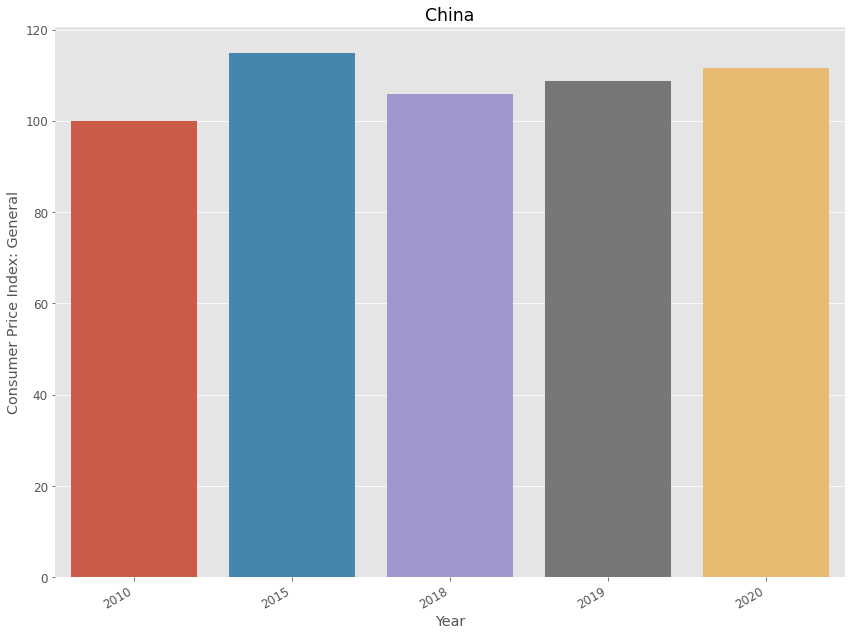

In [27]:
plot_bar(
    data=df1_gpd.get_group(('China', 'General')),
    x='Year', y='Value',
    title='China', xlabel='Year', ylabel='Consumer Price Index: General'
)

<function __main__.plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None)>

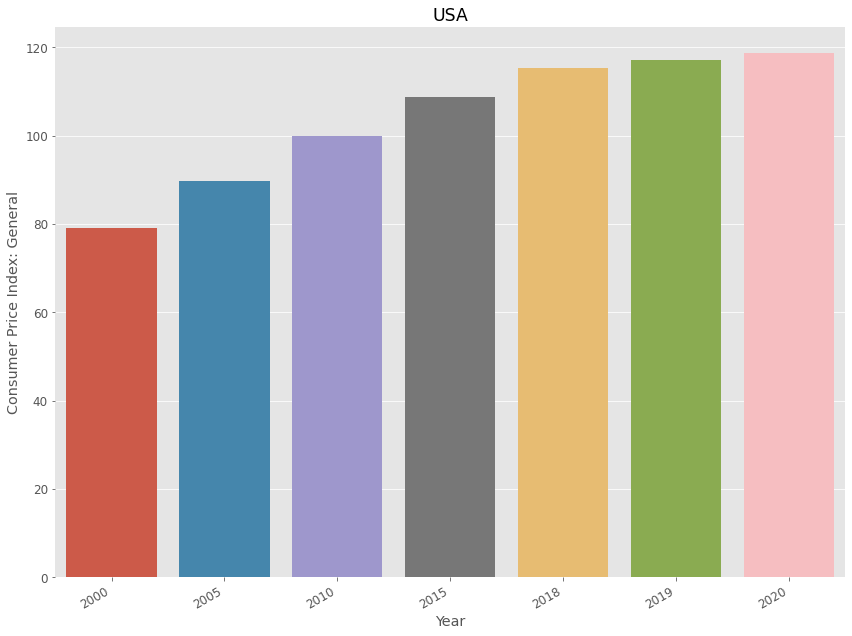

In [28]:
plot_bar(
    data=df1_gpd.get_group(('United States of America', 'General')),
    x='Year', y='Value',
    title='USA', xlabel='Year', ylabel='Consumer Price Index: General'
)

# Consumer Price Index (Food) Exploration

<function __main__.plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None)>

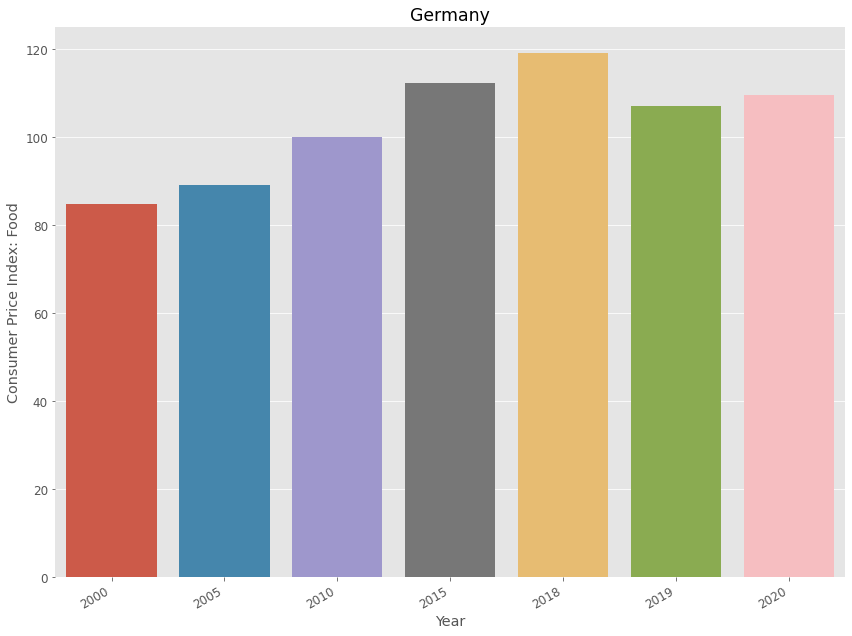

In [29]:
plot_bar(
    data=df1_gpd.get_group(('Germany', 'Food')),
    x='Year', y='Value',
    title='Germany', xlabel='Year', ylabel='Consumer Price Index: Food'
)

<function __main__.plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None)>

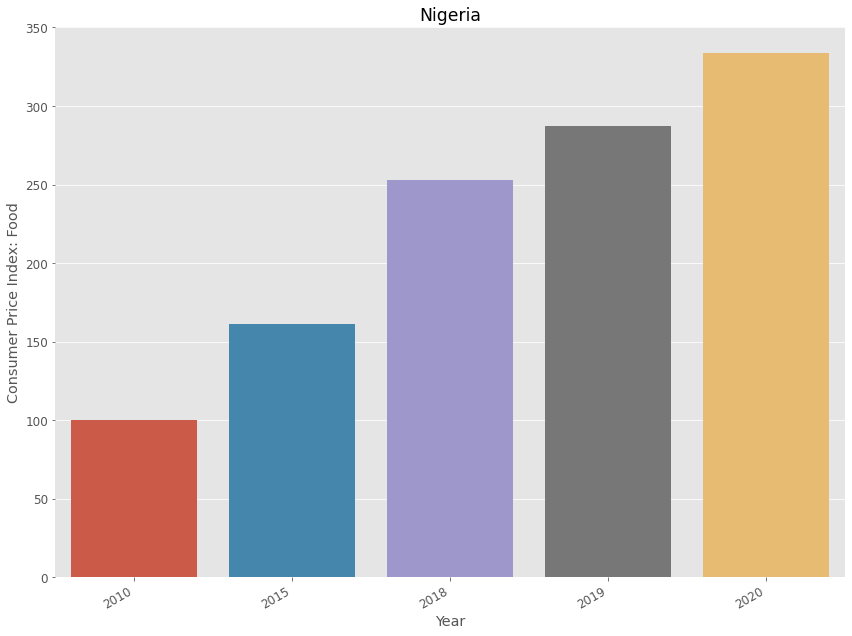

In [30]:
plot_bar(
    data=df1_gpd.get_group(('Nigeria', 'Food')),
    x='Year', y='Value',
    title='Nigeria', xlabel='Year', ylabel='Consumer Price Index: Food'
)

<function __main__.plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None)>

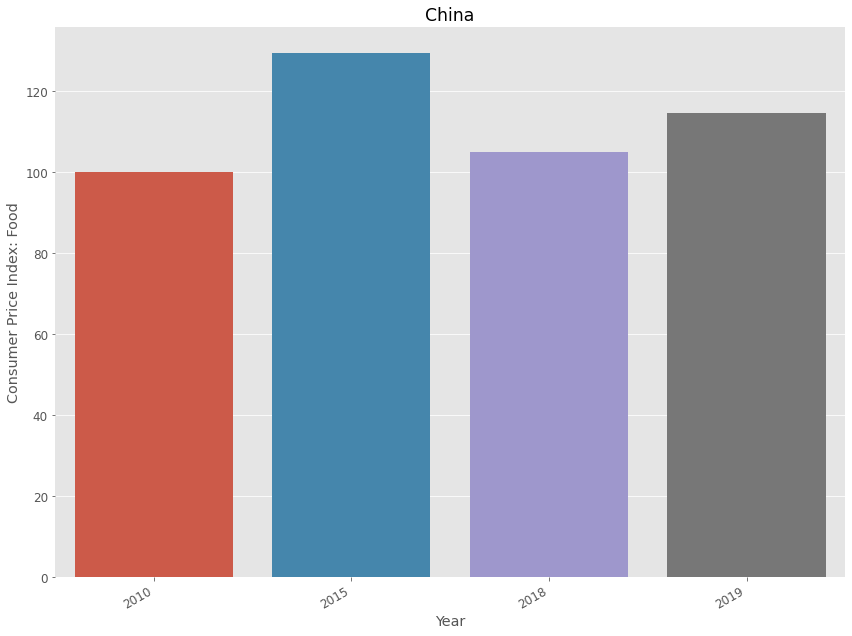

In [31]:
plot_bar(
    data=df1_gpd.get_group(('China', 'Food')),
    x='Year', y='Value',
    title='China', xlabel='Year', ylabel='Consumer Price Index: Food'
)

<function __main__.plot_bar(data, x, y, ci=None, hue=None, title=None, xlabel=None, ylabel=None)>

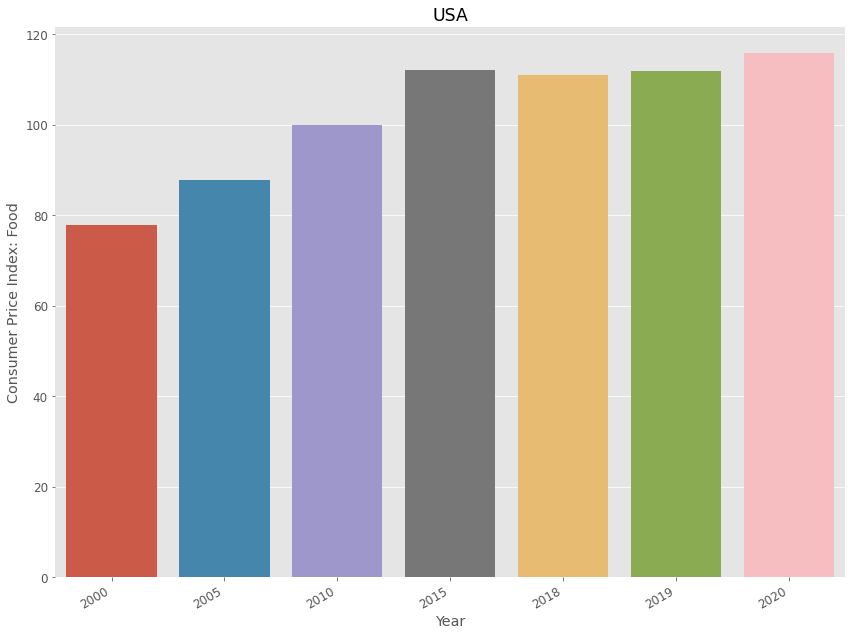

In [32]:
plot_bar(
    data=df1_gpd.get_group(('United States of America', 'Food')),
    x='Year', y='Value',
    title='USA', xlabel='Year', ylabel='Consumer Price Index: Food'
)